In [1]:
%autosave 30
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
path = 'C:/Users/Deepthika/Desktop/Cross Selling Recommendation Project/Cross selling dataset/Test.csv'
test = pd.read_csv(path)
test.describe

Autosaving every 30 seconds


<bound method NDFrame.describe of         fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  \
0       2016-06-28     15889            F              ES    V   56   
1       2016-06-28   1170544            N              ES    H   36   
2       2016-06-28   1170545            N              ES    V   22   
3       2016-06-28   1170547            N              ES    H   22   
4       2016-06-28   1170548            N              ES    H   22   
...            ...       ...          ...             ...  ...  ...   
929610  2016-06-28    660237            N              ES    V   55   
929611  2016-06-28    660238            N              ES    V   30   
929612  2016-06-28    660240            N              ES    V   52   
929613  2016-06-28    660243            N              ES    V   32   
929614  2016-06-28    660248            N              ES    V   92   

        fecha_alta  ind_nuevo  antiguedad  indrel  ... indext  conyuemp  \
0       1995-01-16          0         

In [2]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929615 entries, 0 to 929614
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             929615 non-null  object 
 1   ncodpers               929615 non-null  int64  
 2   ind_empleado           929615 non-null  object 
 3   pais_residencia        929615 non-null  object 
 4   sexo                   929610 non-null  object 
 5   age                    929615 non-null  int64  
 6   fecha_alta             929615 non-null  object 
 7   ind_nuevo              929615 non-null  int64  
 8   antiguedad             929615 non-null  int64  
 9   indrel                 929615 non-null  int64  
 10  ult_fec_cli_1t         1683 non-null    object 
 11  indrel_1mes            929592 non-null  float64
 12  tiprel_1mes            929592 non-null  object 
 13  indresi                929615 non-null  object 
 14  indext                 929615 non-nu

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.impute import SimpleImputer

In [4]:
test.isnull().sum()

fecha_dato                    0
ncodpers                      0
ind_empleado                  0
pais_residencia               0
sexo                          5
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
ult_fec_cli_1t           927932
indrel_1mes                  23
tiprel_1mes                  23
indresi                       0
indext                        0
conyuemp                 929511
canal_entrada              2081
indfall                       0
tipodom                       0
cod_prov                   3996
nomprov                    3996
ind_actividad_cliente         0
renta                         0
segmento                   2248
dtype: int64

In [5]:
test['age'] = pd.to_numeric(test['age'], errors='coerce')
test.antiguedad = pd.to_numeric(test.antiguedad, errors = 'coerce')
test.indrel_1mes = pd.to_numeric(test.indrel_1mes, errors = 'coerce')
test.renta = pd.to_numeric(test.renta, errors = 'coerce')

In [6]:
test["fecha_dato"] = pd.to_datetime(test["fecha_dato"],format="%Y-%m-%d")
test["fecha_alta"] = pd.to_datetime(test["fecha_alta"],format="%Y-%m-%d")

<AxesSubplot:>

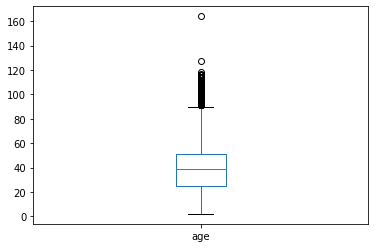

In [7]:
test['age'].plot.box()

In [8]:
test.age.quantile(0.975)

81.0

In [9]:
test.age.quantile(0.025)

20.0

In [10]:
#Drop outlier ages(<18 and >81)

In [11]:
index_names = test[(test['age']  >=81) | (test['age']  <=18)].index

test.drop(index_names, inplace = True)

In [12]:
#Replace NA values for Renta with mean

In [13]:
imputer = SimpleImputer(missing_values= np.nan,strategy= 'mean')
imputer = imputer.fit(test[['renta']])
test['renta']= imputer.transform(test[['renta']])

In [14]:
#Replace NA values for ind_actividad_cliente with the median

In [15]:
test.loc[test.ind_actividad_cliente.isnull(),"ind_actividad_cliente"] = \
test["ind_actividad_cliente"].median()

In [16]:
test = test.drop(["ult_fec_cli_1t", "conyuemp"], axis=1)

In [17]:
test.nomprov.unique()

array(['MADRID', 'ALICANTE', 'CORUÑA, A', 'BARCELONA', 'BALEARS, ILLES',
       'PALMAS, LAS', 'TOLEDO', 'CORDOBA', 'MURCIA', 'CUENCA', 'MALAGA',
       'JAEN', 'CADIZ', 'SEVILLA', 'VALENCIA', 'CASTELLON', 'BADAJOZ',
       'OURENSE', 'GIRONA', 'GRANADA', 'CIUDAD REAL', 'CANTABRIA',
       'CACERES', 'MELILLA', 'ASTURIAS', 'ZARAGOZA', 'HUESCA', 'TERUEL',
       'LUGO', 'BURGOS', 'NAVARRA', 'VALLADOLID', 'SALAMANCA',
       'RIOJA, LA', 'LERIDA', 'LEON', 'GIPUZKOA', 'TARRAGONA', 'SORIA',
       'ALBACETE', 'SEGOVIA', 'HUELVA', 'PONTEVEDRA', 'ALMERIA', 'AVILA',
       'PALENCIA', 'GUADALAJARA', 'ALAVA', 'ZAMORA',
       'SANTA CRUZ DE TENERIFE', nan, 'BIZKAIA', 'CEUTA'], dtype=object)

In [18]:
#Fix Unicode character

In [19]:
test.loc[test.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"

In [20]:
#tipodom doesn't seem to be useful, and the province code is not needed because the name of the province exists in nomprov

In [21]:
test.drop(["tipodom","cod_prov"],axis=1,inplace=True)

In [22]:
#Replace NA values with "UNKNOWN"

In [23]:
test.loc[test.nomprov.isnull(),"nomprov"] = "UNKNOWN"

In [24]:
test.loc[test.fecha_alta.isnull(),"fecha_alta"] = "UNKNOWN"

In [25]:
test.loc[test.indrel.isnull(),"indrel"] = "UNKNOWN"

In [26]:
 test.loc[test.ind_nuevo.isnull(),"ind_nuevo"] = "UNKNOWN"

In [27]:
#NA values in the following are replaced with the mode

In [28]:
test['ind_empleado'].value_counts()

N    895579
B       218
F       152
A       147
S         1
Name: ind_empleado, dtype: int64

In [29]:
test.loc[test.ind_empleado.isnull(), "ind_empleado"] = "N"

In [30]:
test['segmento'].value_counts()

02 - PARTICULARES     514426
03 - UNIVERSITARIO    346028
01 - TOP               33870
Name: segmento, dtype: int64

In [31]:
test.loc[test.segmento.isnull(), "segmento"] = "02 - PARTICULARES"

In [32]:
test['tiprel_1mes'].value_counts()

I    519091
A    376957
P        26
Name: tiprel_1mes, dtype: int64

In [33]:
test.loc[test.tiprel_1mes.isnull(), "tiprel_1mes"] = "I"

In [34]:
test['indrel_1mes'].value_counts()

1.0    896048
3.0        26
Name: indrel_1mes, dtype: int64

In [35]:
test.loc[test.indrel_1mes.isnull(), "indrel_1mes"] = "1.0"

In [36]:
string_data = test.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]

unknown_cols = [col for col in missing_columns if col not in ["indfall","tiprel_1mes","indrel_1mes"]]
for col in unknown_cols:
    test.loc[test[col].isnull(),col] = "UNKNOWN"

In [37]:
test.isnull().sum()

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
dtype: int64

In [38]:
# Test Data CLeaning Done!

In [39]:
# Export Pandas Dataframe to csv file

In [40]:
test.to_csv(r'C:/Users/Deepthika/Desktop/Cross Selling Recommendation Project/Cross selling dataset/TestCleaned.csv')